## Jack of All Trades, Master of One?
We are trying to create an SVM Classifier that takes a cricketer's statistics, such as batting average and bowling economy, and classify whether the cricketer is a better batsman or bowler. In other words, we will be able to tell which is a cricketer's primary skill - batting or bowling? 

This is pretty fun, since we can use it to determine at which skill those rarebred all-rounders are better at!

**SVMs work well with small datasets and high dimensions**, so they will be perfect for our cause. 
Credit to [Alice Zhao](https://github.com/adashofdata) for providing the inspiration needed for this mini-project.

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

### The Training Dataset
We shall be giving the SVM labelled data - hence making this a *supervised learning* technique. 
I am taking the data of 50 of the world's top ODI batsmen (in terms of runs scored since 01 Jan 2010), and 50 of the world's top ODI bowlers (in terms of wickets taken since 01 Jan 2010). This data can be retrieved from ESPNCricinfo's Statsguru. We're looking at the players' batting and bowling averages, strike rates, runs scored and wickets taken in this period.

However, some of the top wicket-takers on the list are known to be competent all-rounders, so we need to replace them with other pure bowlers lower down the list. So out go the likes of Shakib, Thisara Perera, Sir Jadeja and Shane Watson - and in come Mitchell Johnson, Shami, Mashrafe Mortaza and Rabada. After removing all all-rounders, the dataset is left with 40 pure batsmen and 40 pure bowlers.

In [2]:
#load the dataset
cricketers = pd.read_csv('final_dataset.csv')
    
columns = ["Player","Runs Scored","Batting Average", "Batting Strike Rate", "Wickets Taken", "Bowling Average", "Bowling Strike Rate", "Type"]
cricketers

,Player,Runs Scored,Batting Average,Batting Strike Rate,Wickets Taken,Bowling Average,Bowling Strike Rate,Type
0,V Kohli (INDIA),11125,60.79,94.11,4.0,166.25,160.2,Batsman
1,RG Sharma (INDIA),8249,53.56,90.63,8.0,64.37,74.1,Batsman
2,HM Amla (SA),7265,49.76,89.11,NaN,NaN,NaN,Batsman
3,AB de Villiers (SA),6485,64.20,109.76,7.0,28.85,27.4,Batsman
4,LRPL Taylor (NZ),6428,54.01,83.56,0.0,NaN,NaN,Batsman
...,...,...,...,...,...,...,...,...
75,SP Narine (WI),363,11.00,82.31,92.0,26.46,38.4,Bowler
76,MJ Henry (NZ),211,15.07,100.00,92.0,26.48,29.3,Bowler
77,TT Bresnan (ENG),871,19.79,90.25,92.0,33.67,37.0,Bowler
78,GH Dockrell (IRE),579,16.54,69.34,89.0,37.38,47.5,Bowler


### Visualization

Now we take two parameters at a time and plot them to see if they can be used to separate the batsmen from the bowlers. 
Not all parameters work - below you will see that many bowlers have batting strikes even better than the world's best batsmen. Plotting batting v/s bowling average or runs scored v/s bowling economy seems to work much better, as it creates separate clusters of batters and bowlers.  

It is also funny to note that while Kohli stands out as the greatest ODI batsman of the decade, his bowling strike rate  actually puts him miles above the rest.

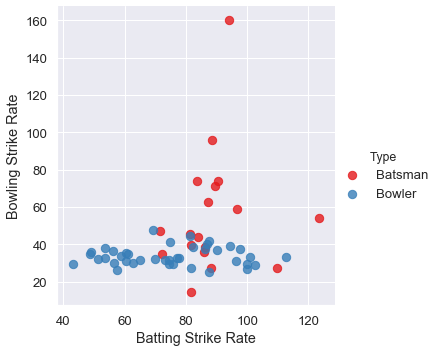

In [4]:
# Plot two parameters
sns.lmplot('Batting Strike Rate', 'Bowling Strike Rate', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

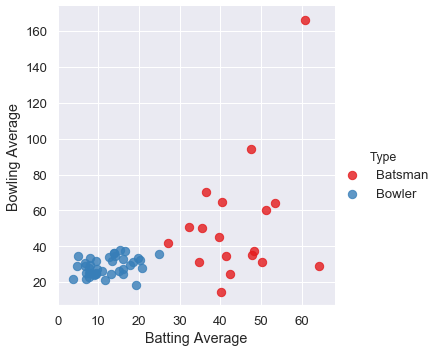

In [5]:
# Plot two parameters
sns.lmplot('Batting Average', 'Bowling Average', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

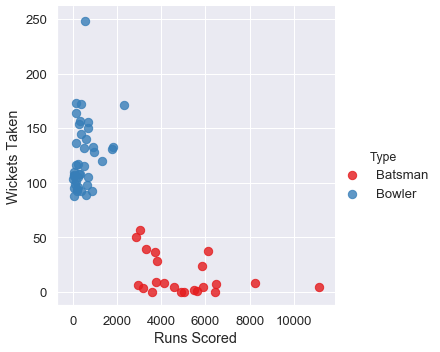

In [7]:
# Plot two parameters
sns.lmplot('Runs Scored', 'Wickets Taken', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

### Handling NaN values

Our dataset has NaN values because there are many batsmen who have either never bowled, or have never taken a wicket (and thus have no bowling average or strike rate). This can be noticed in the first figure above, where batsmen without bowling strike rates do not find a place in the scatterplot. 

We shall impute the missing values with the averages of wickets/averages/strike rates of the other batsmen have taken. These values are:

**For Batsmen who have never bowled** <br>
Average # of wickets taken: 15<br>
Average bowling average: 52.57444<br>
Average bowling strike rate: 55.84444

Batsmen who have never taken a wicket shall be given a bowling average and strike rate of zero.

In [3]:
import math
columns = list(cricketers)

# Imputing average values for batsmen who have never bowled
for i in range(0,40):
    if math.isnan(cricketers['Wickets Taken'][i]):
        cricketers['Wickets Taken'][i] = 15
        cricketers['Bowling Average'][i] = 52.57444
        cricketers['Bowling Strike Rate'][i] = 55.84444

# Imputing average values for batsmen who have never taken a wicket
for i in range(0,40):
    if math.isnan(cricketers['Bowling Average'][i]):
        cricketers['Bowling Average'][i] = 0
        cricketers['Bowling Strike Rate'][i] = 0   

C:\Users\Anantk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Anantk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anantk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Anantk\Anaconda3\lib\site-packages\ipykernel_l

In [44]:
# printing Kumar Sangakarra (who has never bowled)
for i in columns:  
    print (cricketers[i][5]) 
print('\n')
# printing Ross Taylor (who has never taken a wicket)
for i in columns:
    print (cricketers[i][4]) 

KC Sangakkara (SL)
6356
52.96
84.7
15.0
52.57444
55.84444
Batsman


LRPL Taylor (NZ)
6428
54.01
83.56
0.0
0.0
0.0
Batsman


### Creating the Classifier
Let us create our classifier that, for now, shall use four parameters -  runs scored, wickets taken, batting and bowling averages.

We give the SVM model all the inputs, and fit it to the specified parameters. The model creates a decision boundary known as a **hyperplane** that we plot below. On one side of the hyperplane lie the batsmen, and the on the other the bowlers.

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [5]:
# Extract features as matrix
features = ['Runs Scored', 'Batting Average', 'Wickets Taken', 'Bowling Average']
X = cricketers.loc[:, features].values
# Extract target label
Y = cricketers.loc[:, ['Type']].values

# Split into train and test data
# keeping a 40:60 split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.4, random_state=0)

In [6]:
# Build an SVC model using linear regression
model = svm.SVC(kernel= 'linear', C=1)

In [7]:
type_label = np.where(cricketers['Type']=='Batsman', 0, 1)
parameters = cricketers[['Runs Scored','Batting Average','Wickets Taken','Bowling Average']].values
model.fit(parameters, type_label)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### "Tu batting karta hai ya bowling?"

And that's that! Now we can write a small function that stats of a player, call upon the classifier and display the skill they are better at. 

In [72]:
# function that outputs which skill the player is better at
def batsman_or_bowler(runs, batting_avg, wickets, bowling_avg):
    if(model.predict([[runs, batting_avg, wickets, bowling_avg]]))==0:
        print('He\'s a better batsman!')
    else:
        print('He\'s a better bowler!')

Let's have some fun.

Plugging in the stats, we see that Shane Watson is a better ODI batsman. And Sir Jadeja is a better bowler than a batsman. No surprises there. 

However, Shakib is a better batsman than a bowler!
That is surprising, *since he features in the list of top ten wicket-takers since 2010*, and we had to remove him from the dataset. Just goes to show how much value all-rounders like Shakib bring to the playing XI. 

In [73]:
batsman_or_bowler(5757,40.54, 168, 31.79) #for Shane Watson

He's a better batsman!


In [83]:
batsman_or_bowler(2296, 31.88, 187, 36.57) #for Ravindra Jadeja

He's a better bowler!


In [82]:
batsman_or_bowler(6323, 37.86, 260, 30.21) #for Shakib al Hasan

He's a better batsman!


Here's what we get when we look at other players - 

In [89]:
batsman_or_bowler(5830, 41.94, 120, 33.35) #for Angelo Mathews

He's a better batsman!


In [85]:
batsman_or_bowler(1821, 24.94, 136, 36.38) #for Jason Holder

He's a better bowler!


In [88]:
batsman_or_bowler(957, 29.9, 54, 40.64)    #for Hardik Pandya

He's a better bowler!


In [90]:
batsman_or_bowler(1226, 25.02, 143, 30.65) #for Chris Woakes

He's a better bowler!


In [91]:
batsman_or_bowler(2782, 27.82, 130, 32.54) #for Mohammad Nabi

He's a better batsman!


### Plotting this  4-dimensional data
The first three variables can be on the X, Y and Z axes and the 4th can be represented using colour. <br>
Here,  a heatmap with the a color scheme (yellow to green) was used for the 4th feature.

In [92]:
from mpl_toolkits.mplot3d import Axes3D

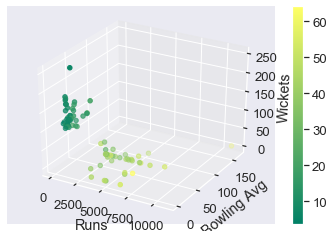

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = cricketers['Runs Scored'].values
y = cricketers['Bowling Average'].values
z = cricketers['Wickets Taken'].values
c = cricketers['Batting Average'].values

ax.set_xlabel('Runs')
ax.set_ylabel('Bowling Avg')
ax.set_zlabel('Wickets')

img = ax.scatter(x, y, z, c=c, cmap=plt.summer())
fig.colorbar(img)
plt.show()